# Keras with TensorFlow Course for students

#### Keras z TensorFlow to popularne narzędzie służące do tworzenia i trenowania modeli głębokiego uczenia. Keras, będący wysokopoziomowym API dla TensorFlow, zapewnia prosty sposób na definicję i edukację modeli sieci neuronowych. Użytkownicy mogą korzystać z gotowych bloków, takich jak warstwy, funkcje aktywacji, i algorytmy optymalizacji, co ułatwia szybkie prototypowanie oraz eksperymentowanie z modelami. TensorFlow, będący silnikiem wykonywania, pozwala na efektywną pracę z modelami na różnych platformach i urządzeniach, takich jak komputery osobiste, serwery czy urządzenia mobilne. Oba narzędzia wspierają różnorodne zadania związane z uczeniem maszynowym, w tym klasyfikację, regresję, rozpoznawanie obrazów i przetwarzanie języka naturalnego.

In [137]:
!pip3 install tensorflow

In [138]:
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

Dane testowe:
   - Testowany był eksperymentalny lek na osobach w wieku od 13 do 100 lat w badaniu klinicznym.
   - Badanie miało 2100 uczestników. Połowa była w wieku poniżej 65 lat, połowa 65 lat lub starsza.
   - Około 95% pacjentów w wieku 65 lat lub starszych doświadczyło skutków ubocznych.
   - Około 95% pacjentów poniżej 65 roku życia nie doświadczyło żadnych skutków ubocznych.

In [139]:
test_samples = []
test_labels = []

In [140]:
for i in range(50):
    # Około ~5% młodszych osób, które doświadczyły skutków ubocznych
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(1)

    # Około ~5% starszych osób, które nie doświadczyły skutków ubocznych
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(0)

for i in range(1000):
    # Około ~95% młodszych osób, które nie doświadczyły skutków ubocznych
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(0)

    # Około ~95% starszych osób, które doświadczyły skutków ubocznych
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(1)

### Wylistowanie naszych danych testowych

In [141]:
print(test_samples)
print(test_labels)

[23, 91, 46, 93, 13, 85, 58, 86, 35, 71, 31, 70, 14, 84, 33, 78, 14, 85, 17, 87, 30, 70, 22, 80, 32, 74, 15, 68, 19, 82, 40, 67, 45, 85, 22, 98, 63, 74, 26, 97, 18, 100, 43, 68, 30, 65, 42, 89, 31, 83, 47, 78, 19, 87, 30, 94, 49, 89, 30, 96, 16, 70, 13, 71, 20, 84, 52, 72, 40, 93, 37, 78, 58, 72, 39, 100, 28, 76, 41, 70, 39, 79, 51, 87, 64, 71, 49, 90, 16, 89, 45, 71, 18, 91, 57, 73, 42, 74, 15, 90, 50, 87, 46, 80, 52, 89, 30, 65, 43, 89, 35, 99, 46, 96, 23, 69, 60, 96, 25, 96, 56, 96, 31, 87, 15, 90, 49, 77, 55, 76, 37, 92, 37, 82, 25, 87, 14, 78, 19, 98, 30, 76, 22, 78, 15, 74, 19, 67, 49, 77, 46, 77, 48, 83, 31, 83, 61, 69, 49, 93, 39, 82, 27, 89, 37, 89, 41, 82, 50, 95, 23, 96, 29, 74, 51, 78, 36, 85, 58, 66, 61, 94, 39, 80, 32, 95, 54, 74, 37, 65, 59, 73, 14, 87, 36, 91, 57, 80, 24, 91, 44, 99, 42, 90, 40, 99, 57, 90, 37, 70, 52, 71, 64, 86, 22, 76, 59, 88, 55, 72, 50, 99, 42, 97, 58, 78, 38, 88, 40, 78, 53, 81, 59, 97, 60, 99, 51, 80, 48, 81, 55, 97, 34, 94, 38, 84, 41, 82, 54, 8

#### Przeformatowanie donych do odpowiedniego formatu (oczekiwanego przez fit)  
[FIT](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential#fit)

In [142]:
test_samples = np.array(test_samples)
test_labels = np.array(test_labels)

#### Wypisanie danych z odpowiednim formatem

In [143]:
print(test_samples)
print(test_labels)

[23 91 46 ... 73 36 67]
[1 0 1 ... 1 0 1]


### "Mieszamy dane"

In [144]:
test_samples, test_labels = shuffle(test_samples, test_labels)

In [145]:
print(test_samples)
print(test_labels)

[23 50 76 ... 95 79 32]
[0 0 1 ... 1 1 0]


![Normalizacja i standaryzacja](normalizacja,standaryzacja.png "Normalizacja i standaryzacja")  

### Użycie obiektu skalarnego min max do utworzenia zakresu funkcji od 0 do 1

In [146]:
scalar = MinMaxScaler(feature_range=(0,1))

### Przekształcenie skali od 13 do 100 na skalę od 0 do 1

In [147]:
scaled_train_samples = scalar.fit_transform(test_samples.reshape(-1,1))

In [148]:
print(scaled_train_samples)

[[0.11494253]
 [0.42528736]
 [0.72413793]
 ...
 [0.94252874]
 [0.75862069]
 [0.2183908 ]]


# Tworzenie sztucznej sieci neuronowej oraz tworzenie modelu sekwencyjnego

In [149]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


### Importowanie modułów TensorFlow, które będą używane do zbudowania pierwszego modelu

In [150]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

### Jeżeli mamy procesor graficzny to zostanie on wykryty i dodany do konfiguracaji

In [151]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
if physical_devices:
    # Ustaw wzrost pamięci na pierwszym dostępnym GPU
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
    print("Wykryty procesor: ", len(physical_devices))
else:
    print("Wkryty procesor: ", len(physical_devices))

Wkryty procesor:  0


### Budowanie najprostszego modelu z użyciem Keras (sekwencyjny model) - wizualizacja  
Można go opisać jako liniowy stos warstw  
![Model](warstwy1.png "Model") 

 ### Tworzenie najprostszego modelu

In [152]:
model = Sequential(
     # Podajemy tutaj listę warstw (gęstych warstw)
    [
      Input(shape=(1,)),  
      Dense(units=16, activation='relu'), 
      Dense(units=32, activation='relu'), 
      Dense(units=2, activation='softmax'), 
      # Dense - najprostsza warstwa sieci neuronowych znana jako gęsto połączona lub w pełni połączona
    ]
)

### Wyświetlanie modelu

In [153]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 16)                  │              32 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 32)                  │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 642 (2.51 KB)

 Trainable params: 642 (2.51 KB)

 Non-trainable params: 0 (0.00 B)

### Stworzona sztuczna sieć neuronowa oraz intuicyjny typ modelu sekwencyjnego

# Szkolenie / Trenowanie sieci neuronowej

#### Kompilacja modelu

In [154]:
# Określenie dla funkcji kompilacji jakiego optimizera chcemy użyć (Adam).
# Podajemy decyzje dot. użycia atomu optimalizatora z szybkością uczenia się (0.0001) jest on bardzo popularny
# Określamy typ straty (sparse_categorical_crossentropy)
# Określamy jakie metryki chcemy zobaczyć. Dotyczy to tylko wydajności modelu (na podstawie czego chcemy móc ocenić nasz model)
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [155]:
model.fit(x=scaled_train_samples, y=test_labels, batch_size=10, epochs=30, shuffle=True, verbose=2)

Epoch 1/30
210/210 - 1s - 7ms/step - accuracy: 0.5286 - loss: 0.6531
Epoch 2/30
210/210 - 0s - 879us/step - accuracy: 0.6081 - loss: 0.6323
Epoch 3/30
210/210 - 0s - 940us/step - accuracy: 0.6762 - loss: 0.6048
Epoch 4/30
210/210 - 0s - 898us/step - accuracy: 0.7471 - loss: 0.5713
Epoch 5/30
210/210 - 0s - 855us/step - accuracy: 0.8005 - loss: 0.5362
Epoch 6/30
210/210 - 0s - 2ms/step - accuracy: 0.8233 - loss: 0.5017
Epoch 7/30
210/210 - 0s - 1ms/step - accuracy: 0.8567 - loss: 0.4676
Epoch 8/30
210/210 - 0s - 931us/step - accuracy: 0.8776 - loss: 0.4354
Epoch 9/30
210/210 - 0s - 959us/step - accuracy: 0.8919 - loss: 0.4065
Epoch 10/30
210/210 - 0s - 879us/step - accuracy: 0.9014 - loss: 0.3815
Epoch 11/30
210/210 - 0s - 1ms/step - accuracy: 0.9157 - loss: 0.3603
Epoch 12/30
210/210 - 0s - 845us/step - accuracy: 0.9105 - loss: 0.3431
Epoch 13/30
210/210 - 0s - 1ms/step - accuracy: 0.9190 - loss: 0.3290
Epoch 14/30
210/210 - 0s - 1ms/step - accuracy: 0.9248 - loss: 0.3174
Epoch 15/30
2

In [156]:
# x=scaled_train_samples określa dane wejściowe do trenowania, które zostały przeskalowane wcześniej.
# y=train_labels określa prawdziwe etykiety dla danych treningowych.
# validation_split=0.1 wskazuje, że 10% danych treningowych powinno być użyte jako zestaw walidacyjny.
# batch_size=10 określa liczbę próbek, które będą przetwarzane w pojedynczej partii.
# epochs=30 ustawia liczbę epok treningowych, czyli ile razy cały zestaw danych przejdzie przez sieć neuronową.
# shuffle=True wskazuje, że dane treningowe powinny być tasowane przed każdą epoką.
# verbose=2 określa, jak wiele informacji o procesie trenowania powinno być wyświetlane (2 oznacza, 
#                                                    że zostanie wyświetlony jeden wiersz na epokę).
model.fit(x=scaled_train_samples, y=test_labels, validation_split=0.1, batch_size=10, epochs=30, shuffle=True, verbose=2)

Epoch 1/30
189/189 - 0s - 2ms/step - accuracy: 0.9349 - loss: 0.2677 - val_accuracy: 0.9810 - val_loss: 0.1888
Epoch 2/30
189/189 - 0s - 2ms/step - accuracy: 0.9402 - loss: 0.2669 - val_accuracy: 0.9762 - val_loss: 0.1868
Epoch 3/30
189/189 - 0s - 1ms/step - accuracy: 0.9386 - loss: 0.2660 - val_accuracy: 0.9762 - val_loss: 0.1857
Epoch 4/30
189/189 - 0s - 1ms/step - accuracy: 0.9370 - loss: 0.2653 - val_accuracy: 0.9810 - val_loss: 0.1850
Epoch 5/30
189/189 - 0s - 1ms/step - accuracy: 0.9392 - loss: 0.2646 - val_accuracy: 0.9810 - val_loss: 0.1842
Epoch 6/30
189/189 - 0s - 1ms/step - accuracy: 0.9376 - loss: 0.2640 - val_accuracy: 0.9810 - val_loss: 0.1842
Epoch 7/30
189/189 - 0s - 2ms/step - accuracy: 0.9381 - loss: 0.2634 - val_accuracy: 0.9810 - val_loss: 0.1830
Epoch 8/30
189/189 - 0s - 1ms/step - accuracy: 0.9407 - loss: 0.2628 - val_accuracy: 0.9810 - val_loss: 0.1815
Epoch 9/30
189/189 - 0s - 1ms/step - accuracy: 0.9413 - loss: 0.2622 - val_accuracy: 0.9762 - val_loss: 0.1794
E

### Predykcja

In [157]:
# 'predictions' to zmienna, która będzie przechowywać wyniki przewidywań modelu.
# Metoda 'predict' modelu z Keras zostanie użyta do wygenerowania przewidywań.
# 'x=scaled_train_samples' wskazuje, że jako dane wejściowe dla przewidywań użyte będą 'scaled_train_samples',
# które są przeskalowanymi próbkami treningowymi.
# 'batch_size=10' określa, że przewidywania będą generowane partiami po 10 próbek. Jest to szczególnie ważne
# przy przetwarzaniu dużych zbiorów danych, ponieważ pomaga to zmniejszyć zużycie pamięci.
# 'verbose=0' oznacza, że podczas wykonywania metody 'predict' nie będą wyświetlane żadne wiadomości
# (poziom szczegółowości logowania jest ustawiony na 0, co oznacza brak wyjścia).
predictions = model.predict(x=scaled_train_samples, batch_size=10, verbose=0)

In [158]:
for p in predictions:
    print(p)

[0.9662084  0.03379161]
[0.9143698  0.08563013]
[0.10946492 0.89053506]
[0.01084569 0.9891543 ]
[0.93573666 0.06426331]
[0.8962847  0.10371529]
[0.011981   0.98801893]
[0.96536094 0.03463908]
[0.07592627 0.9240737 ]
[0.13069665 0.86930335]
[0.02170722 0.97829276]
[0.03901743 0.96098256]
[0.96380246 0.03619755]
[0.02170722 0.97829276]
[0.9656811 0.0343189]
[0.9662084  0.03379161]
[0.16607584 0.8339241 ]
[0.04297361 0.95702636]
[0.9662084  0.03379161]
[0.22715382 0.7728462 ]
[0.9310683  0.06893168]
[0.9662084  0.03379161]
[0.02170722 0.97829276]
[0.7143079  0.28569204]
[0.14357394 0.8564261 ]
[0.9310683  0.06893168]
[0.19480653 0.8051935 ]
[0.26311705 0.736883  ]
[0.06294774 0.93705225]
[0.02914043 0.9708595 ]
[0.01323356 0.98676646]
[0.26311705 0.736883  ]
[0.08330041 0.9166996 ]
[0.03901743 0.96098256]
[0.96525353 0.03474644]
[0.62881905 0.37118104]
[0.04297361 0.95702636]
[0.03541201 0.964588  ]
[0.9669334  0.03306652]
[0.34511462 0.65488535]
[0.08330041 0.9166996 ]
[0.8448663  0.1551

In [159]:
rounded_predictions = np.argmax(predictions, axis=-1)

In [160]:
for p in rounded_predictions:
    print(p)

0
0
1
1
0
0
1
0
1
1
1
1
0
1
0
0
1
1
0
1
0
0
1
0
1
0
1
1
1
1
1
1
1
1
0
0
1
1
0
1
1
0
1
0
1
1
1
0
1
1
1
1
1
0
0
1
1
0
0
1
1
0
1
1
0
0
1
0
0
1
0
1
1
1
0
1
0
1
0
0
1
0
0
1
1
1
1
0
0
0
1
0
0
1
1
1
1
0
0
0
0
1
1
1
0
1
0
0
1
0
0
1
0
0
0
0
1
1
1
0
1
0
0
1
1
1
1
1
1
1
1
0
0
1
0
1
0
1
1
1
1
0
1
0
0
0
1
0
1
0
1
1
0
0
1
0
0
0
1
0
0
0
1
0
1
0
1
0
0
0
1
0
1
0
1
1
0
0
1
1
1
0
1
0
1
0
1
1
0
0
0
0
1
0
1
0
1
1
0
0
0
0
1
1
0
1
1
1
1
0
0
0
0
1
0
1
0
1
1
0
1
0
1
1
0
1
0
1
1
1
0
1
1
0
0
0
1
0
1
0
0
1
1
1
1
0
0
1
0
0
1
0
0
0
1
0
0
0
0
0
0
0
1
0
0
0
1
1
0
0
1
1
0
0
0
1
1
1
1
1
0
1
1
1
1
0
1
1
1
0
1
0
0
0
1
0
0
1
1
0
1
1
0
0
1
1
1
1
1
1
1
0
0
1
1
0
1
1
1
1
1
1
1
1
1
1
1
0
0
1
1
0
1
0
0
0
1
1
0
0
0
0
0
1
1
1
1
1
0
0
1
1
1
1
1
0
0
0
0
1
0
1
1
1
1
1
0
1
0
0
0
1
1
1
0
0
0
0
1
0
0
0
1
1
1
1
1
1
0
0
1
0
0
1
1
1
0
1
1
0
0
0
1
0
0
1
0
1
1
0
1
0
1
0
0
0
0
1
1
1
0
1
0
0
0
0
0
0
1
1
0
0
0
1
1
0
1
0
1
1
0
0
0
1
1
0
0
1
0
1
1
0
1
1
0
0
0
0
1
0
0
1
1
0
0
0
1
1
1
0
1
0
0
1
1
1
0
1
0
1
1
0
1
0
1
0
0
1
0
0
0
0
1
1
1
0
0
1
1
1


### Macierz błędów

In [161]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true=test_labels, y_pred=rounded_predictions)

In [162]:
def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          title='Macierz pomyłek',
                          cmap=plt.cm.Blues):
    """
    To funkcja drukuje i wyświetla macierz pomyłek.
    Normalizację można zastosować, ustawiając normalize=True.
    """
    # Wyświetlanie macierzy pomyłek jako obrazu
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()  # Dodanie paska kolorów obok macierzy
    
    # Tworzenie znaczników dla klas
    tick_marks = np.arange(len(classes))
    # Etykiety osi X z klasami
    plt.xticks(tick_marks, classes, rotation=45)
    # Etykiety osi Y z klasami
    plt.yticks(tick_marks, classes)

    # Normalizacja macierzy pomyłek jeśli parametr normalize=True
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Znormalizowana macierz pomyłek")
    else:
        print('Macierz pomyłek, bez normalizacji')

    # Wyświetlanie wartości w macierzy
    print(cm)

    # Ustalanie progu dla kontrastu tekstu na macierzy
    thresh = cm.max() / 2.
    # Iteracja przez macierz i dodawanie tekstów
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, f"{cm[i, j]:.2f}",
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    
    # Ajustowanie układu by wszystko się zmieściło i było czytelne
    plt.tight_layout()
    plt.ylabel('Prawdziwa etykieta')
    plt.xlabel('Przewidziana etykieta')

Znormalizowana macierz pomyłek
[[0.93714286 0.06285714]
 [0.04666667 0.95333333]]


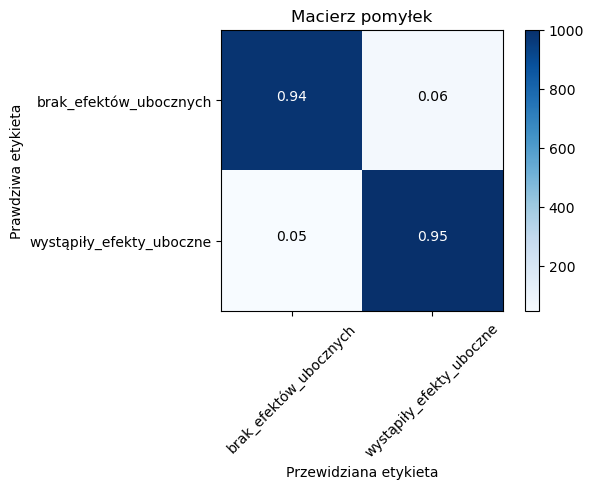

In [163]:
cm_plot_labels = ['brak_efektów_ubocznych', 'wystąpiły_efekty_uboczne']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Macierz pomyłek')

## Zapisywanie modeli

In [164]:
import os.path

In [165]:
model.save('models/WZ_ININ5_all.keras')

## Wczytywanie modeli

In [166]:
from tensorflow.keras.models import load_model

In [167]:
new_model = load_model('models/WZ_ININ5_all.keras')

In [168]:
new_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 16)                  │              32 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 32)                  │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,928 (7.54 KB)

 Trainable params: 642 (2.51 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,286 (5.03 KB)

In [169]:
new_model.get_weights()

[array([[ 0.61739314, -0.00602019, -0.17645034, -0.15881354, -0.15716043,
         -0.05803845, -0.09266484, -0.03654059,  0.6187807 , -0.13950849,
          0.45514828,  0.654025  ,  0.5630521 , -0.01472634, -0.08769548,
         -0.5072035 ]], dtype=float32),
 array([-0.18997584,  0.        ,  0.        ,  0.        ,  0.        ,
         0.19387892,  0.        ,  0.20870142, -0.1585834 ,  0.        ,
        -0.19088702, -0.18372117, -0.15351924,  0.        ,  0.        ,
         0.        ], dtype=float32),
 array([[-4.18174267e-02,  5.77910364e-01,  2.58698408e-03,
         -7.59314373e-02,  1.42174259e-01,  2.86539257e-01,
          4.07229155e-01,  5.33906221e-01, -3.41013283e-01,
          4.63891655e-01,  2.39322618e-01,  4.90134582e-02,
          2.31899559e-01, -2.78801471e-01, -1.44267395e-01,
         -7.32991621e-02,  3.08434457e-01, -1.28561348e-01,
         -4.53512669e-02, -1.55550525e-01,  1.47593111e-01,
         -3.54392558e-01,  5.03211498e-01, -4.66617137e-01,
 

In [170]:
new_model.optimizer

### Przekształcenie modelu do JSON

In [171]:
json_string = new_model.to_json()

In [172]:
json_string

'{"module": "keras", "class_name": "Sequential", "config": {"name": "sequential_2", "trainable": true, "dtype": "float32", "layers": [{"module": "keras.layers", "class_name": "InputLayer", "config": {"batch_shape": [null, 1], "dtype": "float32", "sparse": false, "name": "input_layer_2"}, "registered_name": null}, {"module": "keras.layers", "class_name": "Dense", "config": {"name": "dense_6", "trainable": true, "dtype": "float32", "units": 16, "activation": "relu", "use_bias": true, "kernel_initializer": {"module": "keras.initializers", "class_name": "GlorotUniform", "config": {"seed": null}, "registered_name": null}, "bias_initializer": {"module": "keras.initializers", "class_name": "Zeros", "config": {}, "registered_name": null}, "kernel_regularizer": null, "bias_regularizer": null, "kernel_constraint": null, "bias_constraint": null}, "registered_name": null, "build_config": {"input_shape": [null, 1]}}, {"module": "keras.layers", "class_name": "Dense", "config": {"name": "dense_7", "t

In [173]:
from tensorflow.keras.models import model_from_json

In [174]:
model_architecture = model_from_json(json_string)

In [175]:
model_architecture.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 16)                  │              32 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 32)                  │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,928 (7.54 KB)

 Trainable params: 642 (2.51 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,286 (5.03 KB)

In [176]:
if not os.path.isfile('models/WZ_ININ5_all.weights.h5'):
    model.save_weights('models/WZ_ININ5_all.weights.h5')

In [177]:
model2 = Sequential(
     # Podajemy tutaj listę warstw (gęstych warstw)
    [
      Input(shape=(1,)),  
      Dense(units=16, activation='relu'), 
      Dense(units=32, activation='relu'), 
      Dense(units=2, activation='softmax'), 
      # Dense - najprostsza warstwa sieci neuronowych znana jako gęsto połączona lub w pełni połączona
    ]
)

In [178]:
model2.load_weights('models/WZ_ININ5_all.weights.h5')

In [179]:
model2.get_weights()

[array([[ 6.7493528e-01,  6.5248884e-02,  3.7644908e-01,  6.8435293e-01,
         -5.4284495e-01,  4.6364611e-01, -3.0849248e-01, -1.0896626e-01,
         -1.2955427e-02,  6.9654906e-01, -5.1585501e-01,  5.5069178e-01,
         -1.0574973e-01, -3.2845855e-02,  2.8021445e-06, -8.7179780e-02]],
       dtype=float32),
 array([ 0.02244904,  0.13970706, -0.16152583, -0.1634074 ,  0.        ,
        -0.18342508,  0.        ,  0.        ,  0.        , -0.21244605,
         0.        , -0.19633809,  0.        ,  0.        , -0.0014367 ,
         0.        ], dtype=float32),
 array([[-0.04041224,  0.27725908,  0.34064165, -0.01701178, -0.059569  ,
          0.4097451 ,  0.28266415, -0.05653478,  0.44006568,  0.08535126,
          0.25876462, -0.13586336,  0.40439615,  0.102585  , -0.05165179,
          0.03405243, -0.27183813,  0.21996719, -0.12443765,  0.00550971,
          0.07724048,  0.08951966, -0.03460595, -0.06565747,  0.00282753,
         -0.07411566, -0.04689131, -0.20887105,  0.12103

# Tworzenie Splotowej sieci neuronowej

Splotowa sieć neuronowa (CNN, od ang. Convolutional Neural Network) to rodzaj głębokiej sieci neuronowej, która jest szczególnie skuteczna w analizie danych mających postać siatki, takich jak obrazy. CNN są szeroko stosowane w przetwarzaniu obrazów i wideo, rozpoznawaniu wzorców oraz w systemach sztucznej inteligencji do analizy wizualnej.

#### Główne elementy splotowej sieci neuronowej:
- Warstwy splotowe (Convolutional Layers):
W tych warstwach wykorzystuje się operacje splotu, które polegają na przesuwaniu małej macierzy (filtru lub jądra) przez wejściową macierz danych (np. obraz), generując mapę cech. Proces ten pomaga wydobyć istotne cechy z obrazów, takie jak krawędzie, kształty czy tekstury.
- Warstwy łączenia (Pooling Layers):
Często stosowane po warstwach splotowych, mają za zadanie redukować wymiary przestrzenne (szerokość, wysokość) mapy cech, co pomaga zmniejszyć ilość parametrów i obliczeń w sieci. Najczęściej używanym typem jest pooling maksymalizujący (max pooling), który wybiera maksymalną wartość z każdego fragmentu mapy cech.
- Warstwy normalizacji (Normalization Layers):
Te warstwy normalizują dane wejściowe lub wyjściowe z warstw, co może przyczynić się do lepszej szybkości konwergencji podczas uczenia oraz do zwiększenia stabilności sieci.
- Warstwy pełnego połączenia (Fully Connected Layers):
W tych warstwach każdy neuron jest połączony z każdym neuronem w poprzedniej warstwie, co pozwala na integrację wyuczonych cech do finalnej klasyfikacji lub regresji.

#### Zastosowania:
- Rozpoznawanie obrazów: CNN są podstawą wielu systemów rozpoznawania obrazów, od identyfikacji twarzy po automatyczne oznaczanie zdjęć.
- Analiza wideo: Zastosowanie CNN w rozpoznawaniu akcji, śledzeniu ruchu i innych zadaniach związanych z wideo.
- Rozpoznawanie mowy i przetwarzanie języka naturalnego: Choć głównie stosowane w przetwarzaniu obrazów, CNN znajdują także zastosowanie w analizie sekwencyjnej, np. w rozpoznawaniu mowy.
- Systemy autonomiczne: W samochodach autonomicznych, CNN mogą pomóc w interpretacji wizualnej otoczenia pojazdu do nawigacji i unikania przeszkód.

Splotowe sieci neuronowe dzięki swojej zdolności do efektywnego przetwarzania dużych ilości danych wizualnych i wydobywania z nich kluczowych informacji, zrewolucjonizowały wiele dziedzin technologii.

### Importowanie niezbędnych bibliotek

In [180]:
# Import biblioteki numpy do pracy z tablicami i wykonywania operacji numerycznych
import numpy as np
# Import biblioteki TensorFlow, która jest podstawową biblioteką do pracy z sieciami neuronowymi
import tensorflow as tf
# Import API keras z tensorflow, które upraszcza wiele zadań związanych z sieciami neuronowymi
from tensorflow import keras
# Import modelu Sequential z Keras; jest to liniowy stos warstw sieci neuronowej
from tensorflow.keras.models import Sequential
# Import różnych rodzajów warstw i operacji z Keras, które można użyć w sieciach neuronowych
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
# Import optymalizatora Adam, metody, która zmienia atrybuty sieci neuronowej, takie jak wagi i szybkość uczenia się, aby zmniejszyć straty
from tensorflow.keras.optimizers import Adam
# Import categorical_crossentropy, funkcji straty używanej dla klas, które są większe niż 2
from tensorflow.keras.metrics import categorical_crossentropy
# Import ImageDataGenerator z Keras do augmentacji obrazów na potrzeby treningu, co poprawia dokładność modelu
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Import confusion_matrix z sklearn.metrics do oceny dokładności klasyfikacji
from sklearn.metrics import confusion_matrix
# Import itertools dla efektywnego tworzenia pętli
import itertools
# Import os, biblioteki używanej do interakcji z systemem operacyjnym, nawigacji po folderach i zarządzania plikami
import os
# Import shutil, biblioteki używanej do operacji na plikach, takich jak kopiowanie i usuwanie
import shutil
# Import random do generowania liczb losowych
import random
# Import glob, biblioteki używanej do odzyskiwania plików/nazw ścieżek pasujących do określonego wzorca
import glob
# Import pyplot z matplotlib, biblioteki do tworzenia wykresów
import matplotlib.pyplot as plt
import PIL
# Import warnings do kontroli komunikatów ostrzegawczych
import warnings
# Ustaw filtr ostrzeżeń na ignorowanie przyszłych ostrzeżeń, często używane do tłumienia ostrzeżeń o przestarzałych funkcjach
warnings.simplefilter(action='ignore', category=FutureWarning)
# Konfiguracja matplotlib do wyświetlania rysunków osadzonych w notatniku
%matplotlib inline

In [181]:
# Wylistowanie dostępnych fizycznych urządzeń typu GPU za pomocą TensorFlow.
# Ta funkcja pozwala na zidentyfikowanie wszystkich dostępnych GPU w systemie, co jest przydatne, gdy chcemy skonfigurować TensorFlow
# do korzystania z określonych urządzeń sprzętowych.
physical_devices = tf.config.experimental.list_physical_devices('GPU')

# Sprawdzanie, czy jakiekolwiek GPU są dostępne
if physical_devices:
    # Jeśli GPU są dostępne, ustaw wzrost pamięci na pierwszym dostępnym GPU.
    # Wzrost pamięci oznacza, że TensorFlow nie zajmie całej dostępnej pamięci na GPU od razu, ale będzie zwiększał jej użycie
    # w miarę potrzeby. Jest to przydatne, aby uniknąć konfliktów z innymi procesami, które mogą potrzebować GPU.
    tf.config.experimental.set_memory_growth(physical_devices[0], True)

    # Wypisanie liczby dostępnych GPU.
    print("Num GPUs Available: ", len(physical_devices))
else:
    # Jeśli nie ma dostępnych GPU, również wypisanie tej informacji.
    print("Num GPUs Available: ", len(physical_devices))

Num GPUs Available:  0


### Przygotowanie danych

In [212]:
path_to_data = 'C:/data/dogs-vs-cats'

In [213]:
os.chdir(path_to_data)

In [214]:
# Skrypt Pana Mateusza 69731

# import os
# import tkinter as tk
# from tkinter import filedialog
 
# def rename_files(folder_path):
#     files = [f for f in os.listdir(folder_path) if f.lower().endswith('.jpg')]
   
   
#     files.sort()
 
 
#     for index, filename in enumerate(files):
#         new_name = f"Cat.{index + 1}.jpg"
#         old_file = os.path.join(folder_path, filename)
#         new_file = os.path.join(folder_path, new_name)
       
#         os.rename(old_file, new_file)
#         print(f"Renamed '{filename}' to '{new_name}'")
 
# def select_folder():
#     root = tk.Tk()
#     root.withdraw()  
#     folder_path = filedialog.askdirectory()  
#     if folder_path:
#         rename_files(folder_path)
#     else:
#         print("No folder selected")
 
# if __name__ == "__main__":
#     select_folder()



# Jedyne co trzeba zmienic to pogrubione wyrazenie w kodzie "Dog" na "Cat" lub odwrotnie w zaleznosci co teraz zmieniamy


In [215]:
### W powershell (czyli Windows) Skrypt Pana Witolda 69733

In [216]:
### Get-ChildItem *.jpg | Rename-Item -NewName { $_.Name -replace '^','cat.' }

In [221]:
if not os.path.isdir('train/dog'):
    os.makedirs('train/dog')
    os.makedirs('train/cat')
    os.makedirs('valid/dog')
    os.makedirs('valid/cat')
    os.makedirs('test/dog')
    os.makedirs('test/cat')

    for c in random.sample(glob.glob('cat*'), 500):
        shutil.move(c, 'train/cat')
    for c in random.sample(glob.glob('dog*'), 500):
        shutil.move(c, 'train/dog')
    for c in random.sample(glob.glob('cat*'), 100):
        shutil.move(c, 'valid/cat')
    for c in random.sample(glob.glob('dog*'), 100):
        shutil.move(c, 'valid/dog')
    for c in random.sample(glob.glob('cat*'), 50):
        shutil.move(c, 'test/cat')
    for c in random.sample(glob.glob('dog*'), 50):
        shutil.move(c, 'test/dog')

os.chdir('../../')

In [222]:
# Definiowanie ścieżki do danych treningowych
train_path = 'C:/data/dogs-vs-cats/train'
# Definiowanie ścieżki do danych walidacyjnych
valid_path = 'C:/data/dogs-vs-cats/valid'
# Definiowanie ścieżki do danych testowych
test_path = 'C:/data/dogs-vs-cats/test'

In [223]:
# Tworzenie generatora danych dla zestawu treningowego z preprocessowaniem specyficznym dla VGG16
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=train_path, target_size=(224, 224), classes=['cat', 'dog'], batch_size=10)

# Tworzenie generatora danych dla zestawu walidacyjnego z preprocessowaniem specyficznym dla VGG16
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=valid_path, target_size=(224, 224), classes=['cat', 'dog'], batch_size=10)

# Tworzenie generatora danych dla zestawu testowego z preprocessowaniem specyficznym dla VGG16 i bez przetasowania
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=test_path, target_size=(224, 224), classes=['cat', 'dog'], batch_size=10, shuffle=False)

Found 1000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [224]:
# Sprawdzenie, czy liczba próbek w danych treningowych wynosi 1000
assert train_batches.n == 1000
# Sprawdzenie, czy liczba próbek w danych walidacyjnych wynosi 200
assert valid_batches.n == 200
# Sprawdzenie, czy liczba próbek w danych testowych wynosi 100
assert test_batches.n == 100
# Sprawdzenie, czy liczba klas jest taka sama dla zestawów treningowych, walidacyjnych i testowych, oraz czy wynosi 2
assert train_batches.num_classes == valid_batches.num_classes == test_batches.num_classes == 2

In [225]:
imgs, labels = next(train_batches)

In [226]:
# Definicja funkcji do wyświetlania obrazów w formie siatki
def plotImages(images_arr):
    # Tworzenie figury i osi dla wykresów
    fig, axes = plt.subplots(1, 10, figsize=(20, 20))
    # Spłaszczenie listy osi dla łatwiejszego iterowania
    axes = axes.flatten()
    # Pętla przez pary obrazów i odpowiadające im osie
    for img, ax in zip(images_arr, axes):
        # Wyświetlenie obrazu na danej osi
        ax.imshow(img)
        # Wyłączenie osi na wykresie
        ax.axis('off')
    # Dostosowanie layoutu, aby elementy nie nakładały się na siebie
    plt.tight_layout()
    # Wyświetlenie wykresu
    plt.show()

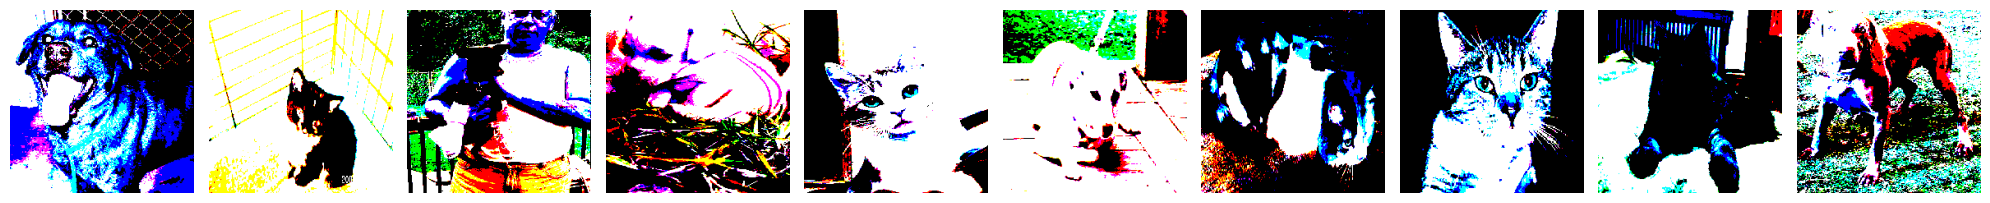

[[0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]]


In [227]:
plotImages(imgs)
print(labels)

In [228]:
# Tworzenie modelu sekwencyjnego z wykorzystaniem obiektu Input jako pierwszej warstwy
model = Sequential([
    # Dodanie warstwy Input określającej kształt wejściowy
    Input(shape=(224, 224, 3)),
    # Dodanie pierwszej warstwy konwolucyjnej bez podawania input_shape
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'),
    # Dodanie warstwy MaxPooling
    MaxPool2D(pool_size=(2, 2), strides=2),
    # Dodanie drugiej warstwy konwolucyjnej
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
    # Dodanie kolejnej warstwy MaxPooling
    MaxPool2D(pool_size=(2, 2), strides=2),
    # Spłaszczenie danych przed przekazaniem do warstwy Dense
    Flatten(),
    # Dodanie warstwy Dense z dwoma jednostkami wyjściowymi i funkcją aktywacji softmax
    Dense(units=2, activation='softmax'),
])

In [229]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 224, 224, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 112, 112, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 200704)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 2)                   │         401,410 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 420,802 (1.61 MB)

 Trainable params: 420,802 (1.61 MB)

 Non-trainable params: 0 (0.00 B)

In [230]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [232]:
model.fit(x=train_batches, validation_data=valid_batches, epochs=10, verbose=2)

Epoch 1/10
100/100 - 14s - 144ms/step - accuracy: 1.0000 - loss: 2.8510e-04 - val_accuracy: 0.7100 - val_loss: 2.2083
Epoch 2/10
100/100 - 14s - 141ms/step - accuracy: 1.0000 - loss: 2.5148e-04 - val_accuracy: 0.7100 - val_loss: 2.2084
Epoch 3/10
100/100 - 14s - 145ms/step - accuracy: 1.0000 - loss: 2.2323e-04 - val_accuracy: 0.7100 - val_loss: 2.2082
Epoch 4/10
100/100 - 14s - 140ms/step - accuracy: 1.0000 - loss: 1.9795e-04 - val_accuracy: 0.7100 - val_loss: 2.2069
Epoch 5/10
100/100 - 14s - 139ms/step - accuracy: 1.0000 - loss: 1.7419e-04 - val_accuracy: 0.7000 - val_loss: 2.2045
Epoch 6/10
100/100 - 14s - 143ms/step - accuracy: 1.0000 - loss: 1.4744e-04 - val_accuracy: 0.7000 - val_loss: 2.2104
Epoch 7/10
100/100 - 14s - 142ms/step - accuracy: 1.0000 - loss: 1.2307e-04 - val_accuracy: 0.7000 - val_loss: 2.2245
Epoch 8/10
100/100 - 14s - 142ms/step - accuracy: 1.0000 - loss: 9.8360e-05 - val_accuracy: 0.7000 - val_loss: 2.2396
Epoch 9/10
100/100 - 14s - 140ms/step - accuracy: 1.0000

In [233]:
test_imgs, test_labels = next(test_batches)

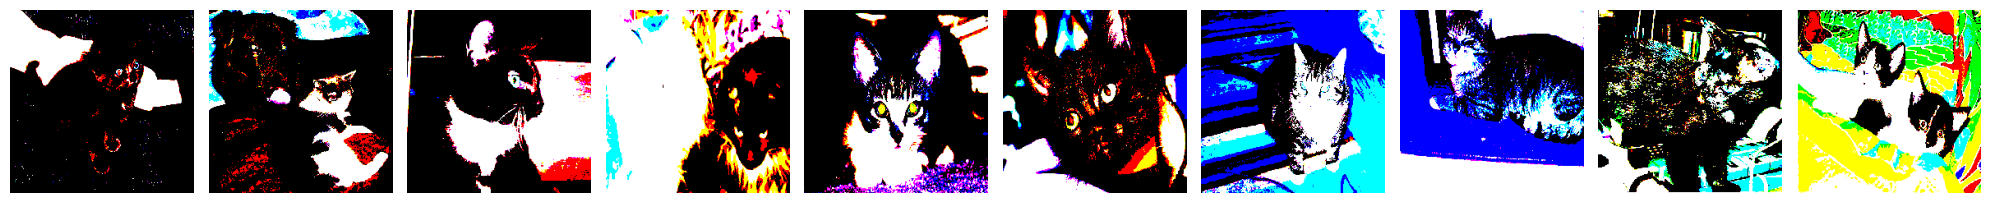

In [234]:
plotImages(test_imgs)

In [235]:
print(test_labels)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [236]:
test_batches.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [237]:
predictions = model.predict(x=test_batches, verbose=0)

In [238]:
np.round(predictions)

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.

In [239]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))

In [240]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Macierz pomyłek',
                          cmap=plt.cm.Blues):
    """
    Ta funkcja drukuje i rysuje macierz pomyłek.
    Normalizację można zastosować ustawiając `normalize=True`.
    """

    # Rysuje macierz pomyłek jako obraz w kolorach określonych przez mapę kolorów 'cmap'.
    # 'interpolation' ustawione na 'nearest' zapobiega jakimkolwiek próbom interpolacji między punktami.
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    
    # Ustawia tytuł wykresu. Tytuł pojawia się nad macierzą pomyłek.
    plt.title(title)
    
    # Dodaje pasek kolorów po prawej stronie wykresu, który pokazuje zależność między wartościami macierzy a kolorami.
    plt.colorbar()
    
    # Tworzy listę indeksów od 0 do liczby klas - używane do oznaczania podziałek na osiach X i Y.
    tick_marks = np.arange(len(classes))
    
    # Ustawia etykiety na osi X (poziomej) z listy 'classes', obracając je o 45 stopni dla lepszej czytelności.
    plt.xticks(tick_marks, classes, rotation=45)
    
    # Ustawia etykiety na osi Y (pionowej) z listy 'classes'.
    plt.yticks(tick_marks, classes)

    # Jeśli ustawiono normalizację, skaluje wartości w macierzy do zakresu 0-1.
    if normalize:
        # Normalizacja polega na podzieleniu każdej wartości wiersza przez sumę tego wiersza, 
        # co przekształca liczby w prawdopodobieństwa klasyfikacji dla każdej klasy.
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Znormalizowana macierz pomyłek")
    else:
        print('Macierz pomyłek bez normalizacji')

    # Drukuje macierz pomyłek w konsoli, co jest przydatne do analizy tekstowej.
    print(cm)

    # Ustala próg koloru tekstu na macierzy w zależności od maksymalnej wartości w macierzy.
    # Tekst będzie biały, jeśli wartość jest wyższa niż połowa maksymalnej wartości, w przeciwnym razie czarny.
    thresh = cm.max() / 2.
    
    # Iteruje przez wszystkie elementy macierzy (indeksy i wartości)
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        # Dodaje wartości do każdej komórki macierzy. 'format' kontroluje, jak wartości są formatowane (np. 2 miejsca po przecinku).
        plt.text(j, i, format(cm[i, j], '.2f'),
                 horizontalalignment="center",  # Tekst wyśrodkowany w komórce
                 color="white" if cm[i, j] > thresh else "black")  # Warunek koloru tekstu

    # Ajustuje układ, aby zapewnić, że wszystko jest czytelne i nic się nie nakłada.
    plt.tight_layout()
    
    # Dodaje etykiety dla osi Y, opisującą co reprezentują wartości na tej osi.
    plt.ylabel('Prawdziwa etykieta')
    
    # Dodaje etykiety dla osi X, opisującą co reprezentują wartości na tej osi.
    plt.xlabel('Przewidywana etykieta')


In [241]:
test_batches.class_indices

{'cat': 0, 'dog': 1}

Macierz pomyłek bez normalizacji
[[32 18]
 [16 34]]


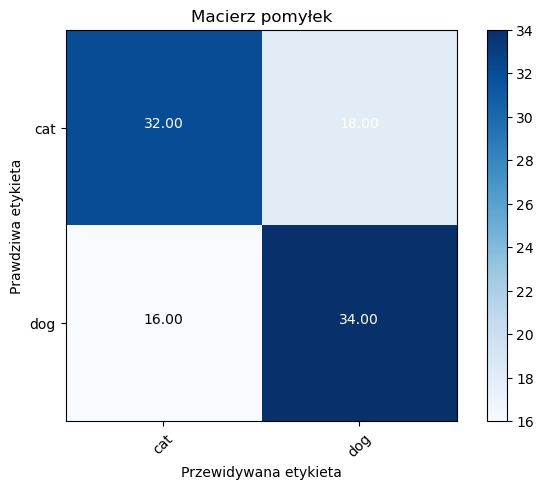

In [242]:
# Definiowanie etykiet do wyświetlenia w macierzy pomyłek
cm_plot_labels = ['cat', 'dog']

# Rysowanie macierzy pomyłek z odpowiednimi etykietami i tytułem
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Macierz pomyłek')

# Model VGG16

In [243]:
vgg16_model = tf.keras.applications.vgg16.VGG16()

In [244]:
vgg16_model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc1 (Dense)                          │ (None, 4096)                │     102,764,544 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

In [245]:
type(vgg16_model)

keras.src.models.functional.Functional

In [246]:
model = Sequential()

In [247]:
for layer in vgg16_model.layers[:-1]: ## z wyjątkiem ostatniej warstwy
    model.add(layer)

In [248]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc1 (Dense)                          │ (None, 4096)                │     102,764,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc2 (Dense)                          │ (None, 4096)                │      16,781,312 │
└──────────────────────────────────────┴─────────────────────────────┴──────────────

 Total params: 134,260,544 (512.16 MB)

 Trainable params: 134,260,544 (512.16 MB)

 Non-trainable params: 0 (0.00 B)

In [249]:
## Spowoduje to zamożożenie wag i odchyleń ze wszystkich warstw modelu, tak aby nie były one szkolone (nasz model nauczył już się tych cech)
for layer in model.layers:
    layer.trainable = False  # Ustaw wszystkie warstwy modelu jako nieuczące się

In [250]:
model.add(Dense(units=2, activation='softmax'))  # Dodaj nową warstwę Dense z 2 jednostkami i aktywacją softmax (Pies i kot)

In [251]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc1 (Dense)                          │ (None, 4096)                │     102,764,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc2 (Dense)                          │ (None, 4096)                │      16,781,312 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 134,268,738 (512.19 MB)

 Trainable params: 8,194 (32.01 KB)

 Non-trainable params: 134,260,544 (512.16 MB)

In [252]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [253]:
model.fit(x=train_batches, validation_data=valid_batches, epochs=5, verbose=2)

Epoch 1/5
100/100 - 117s - 1s/step - accuracy: 0.8860 - loss: 0.2716 - val_accuracy: 0.9450 - val_loss: 0.1083
Epoch 2/5
100/100 - 108s - 1s/step - accuracy: 0.9750 - loss: 0.0744 - val_accuracy: 0.9800 - val_loss: 0.0852
Epoch 3/5
100/100 - 112s - 1s/step - accuracy: 0.9850 - loss: 0.0506 - val_accuracy: 0.9750 - val_loss: 0.0816
Epoch 4/5
100/100 - 107s - 1s/step - accuracy: 0.9920 - loss: 0.0373 - val_accuracy: 0.9800 - val_loss: 0.0775
Epoch 5/5
100/100 - 109s - 1s/step - accuracy: 0.9940 - loss: 0.0290 - val_accuracy: 0.9750 - val_loss: 0.0807


In [254]:
assert model.history.history.get('accuracy')[-1] > 0.95

In [255]:
# Predykcje modelu na danych testowych
predictions = model.predict(x=test_batches, verbose=0)

In [256]:
test_batches.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [258]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))

In [259]:
test_batches.class_indices

{'cat': 0, 'dog': 1}

In [260]:
cm_plot_labels = ['cat', 'dog']

Macierz pomyłek bez normalizacji
[[48  2]
 [ 3 47]]


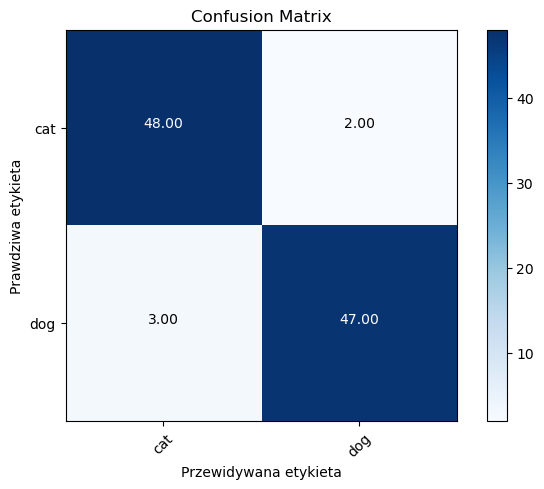

In [261]:
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

## Klasyfikacja obrazów przy użyciu MobileNet z wykorzystaniem Keras API w TensorFlow  
Wprowadźmy MobileNet, klasę lekkich, głębokich sieci konwolucyjnych, które są znacznie mniejsze pod względem rozmiaru i szybsze pod względem wydajności niż wiele innych popularnych modeli. Zobaczymy również, jak możemy pracować z MobileNet w kodzie, korzystając z Keras API w TensorFlow.  

MobileNet to klasa małych, nisko opóźnionych, energooszczędnych modeli, które mogą być używane do klasyfikacji, detekcji i innych zadań, do których konwolucyjne sieci neuronowe są dobrze przystosowane. Ze względu na ich mały rozmiar, są to świetne modele głębokiego uczenia, które mogą być używane na urządzeniach mobilnych.

| Model       | Size    | Parameters    |
|-------------|---------|---------------|
| VGG16       | 553 MB  | 138,000,000   |
| Mobile Net  | 17 MB   | 4,200,000     |


In [262]:
import numpy as np  # Import biblioteki numpy i nadanie jej aliasu np
import tensorflow as tf  # Import biblioteki tensorflow i nadanie jej aliasu tf
from tensorflow import keras  # Import modułu keras z tensorflow

# Importowanie potrzebnych klas i funkcji z tensorflow.keras
from tensorflow.keras.layers import Dense, Activation  
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications import imagenet_utils

# Importowanie confusion_matrix z biblioteki sklearn
from sklearn.metrics import confusion_matrix

import itertools  # Import biblioteki itertools
import os  # Import biblioteki os do operacji na systemie operacyjnym
import shutil  # Import biblioteki shutil do operacji na plikach i katalogach
import random  # Import biblioteki random do generowania losowych liczb
import matplotlib.pyplot as plt  # Import biblioteki matplotlib.pyplot i nadanie jej aliasu plt
# Ustawienie trybu inline dla matplotlib (rysunki będą wyświetlane w notebooku)
%matplotlib inline 

In [263]:
mobile = tf.keras.applications.mobilenet.MobileNet()

17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [267]:
# Funkcja do przygotowania obrazu
def prepare_image(file):
    img_path = 'C:/data/MobileNet-samples/'  # Ścieżka do katalogu z próbkami obrazów
    img = image.load_img(img_path + file, target_size=(224, 224))  # Ładowanie obrazu i zmiana rozmiaru na 224x224 pikseli
    img_array = image.img_to_array(img)  # Konwersja obrazu do tablicy numpy
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)  # Dodanie dodatkowego wymiaru do tablicy
    return tf.keras.applications.mobilenet.preprocess_input(img_array_expanded_dims)  # Przetwarzanie wstępne obrazu zgodnie z wymaganiami MobileNet


In [268]:
from IPython.display import Image

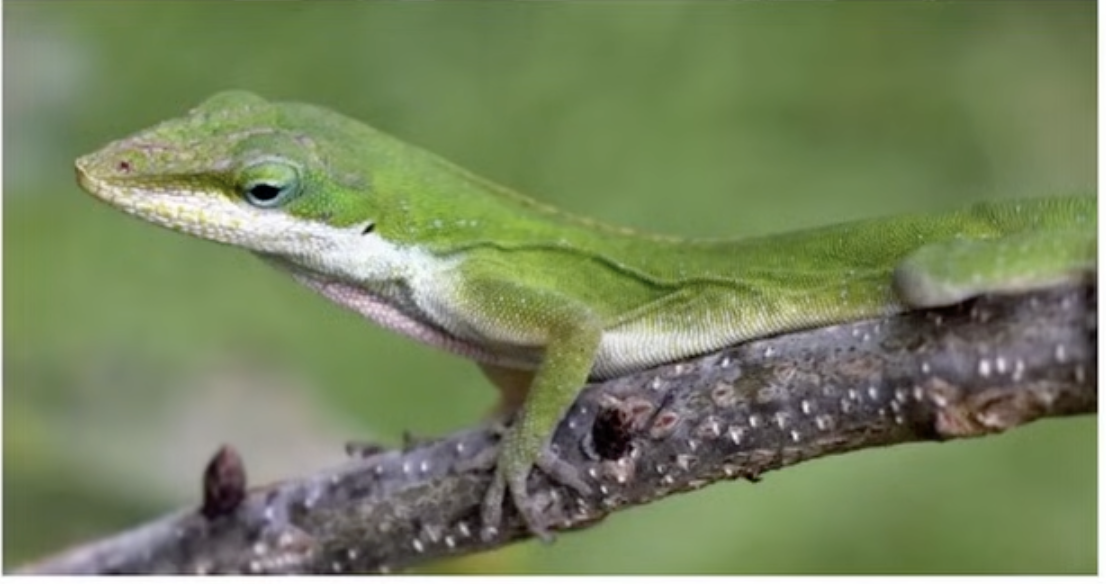

In [270]:
Image(filename='C:/data/MobileNet-samples/1.PNG', width=300, height=200)

In [271]:
# Przygotowanie obrazu do predykcji
preprocessed_image = prepare_image('1.PNG')

# Predykcja z użyciem modelu MobileNet
predictions = mobile.predict(preprocessed_image)

# Dekodowanie predykcji na zrozumiałe etykiety
results = imagenet_utils.decode_predictions(predictions)

# Wyświetlenie wyników
results

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 731ms/step
35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 5us/step


[[('n01682714', 'American_chameleon', 0.85299987),
  ('n01693334', 'green_lizard', 0.0768195),
  ('n01687978', 'agama', 0.019048717),
  ('n01685808', 'whiptail', 0.015563157),
  ('n01689811', 'alligator_lizard', 0.013041261)]]

In [272]:
# Sprawdzenie, czy pierwszy wynik to 'American chameleon'
assert results[0][0][1] == 'American_chameleon'
print(results[0][0][1] == 'American_chameleon')

True


In [273]:
print(results[0][0][1])

American_chameleon


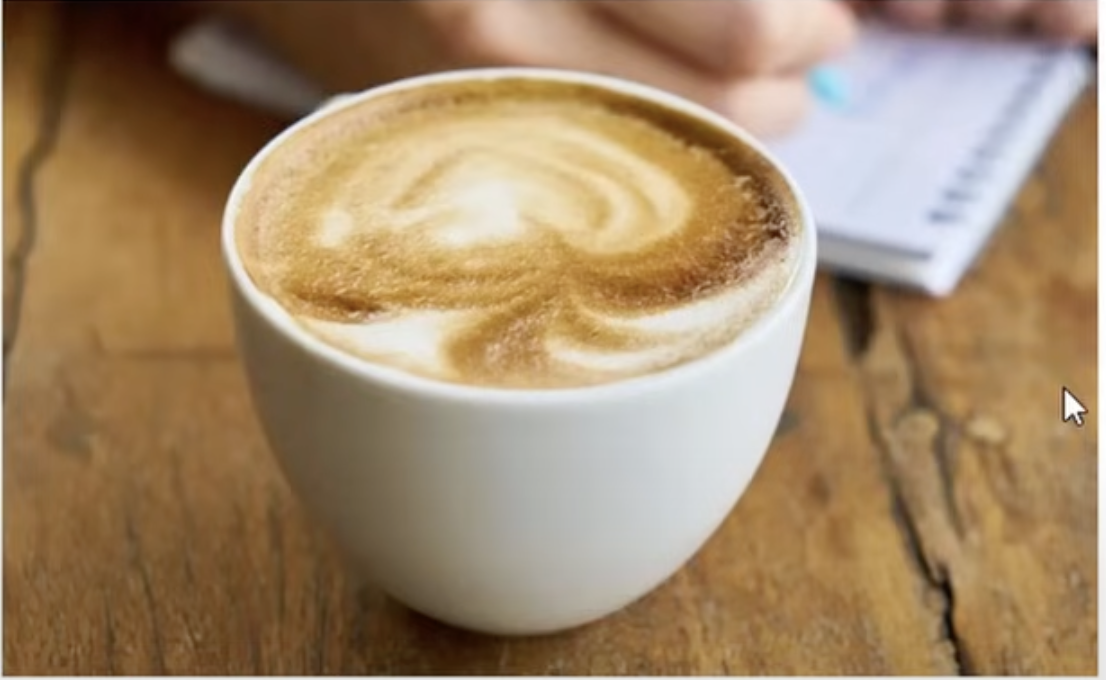

In [274]:
Image(filename='data/MobileNet-samples/2.PNG', width=300, height=200)  # Wyświetlenie obrazu o podanych wymiarach

In [275]:
# Przygotowanie obrazu do predykcji
preprocessed_image = prepare_image('2.PNG')

# Predykcja z użyciem modelu MobileNet
predictions = mobile.predict(preprocessed_image)

# Dekodowanie predykcji na zrozumiałe etykiety
results = imagenet_utils.decode_predictions(predictions)

# Wyświetlenie wyników
results

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


[[('n07920052', 'espresso', 0.90556616),
  ('n07932039', 'eggnog', 0.08071831),
  ('n07930864', 'cup', 0.011229869),
  ('n03063599', 'coffee_mug', 0.001812136),
  ('n07584110', 'consomme', 0.00015315342)]]

In [276]:
# Sprawdzenie, czy pierwszy wynik to 'American chameleon'
assert results[0][0][1] == 'espresso'
print(results[0][0][1] == 'espresso')

True


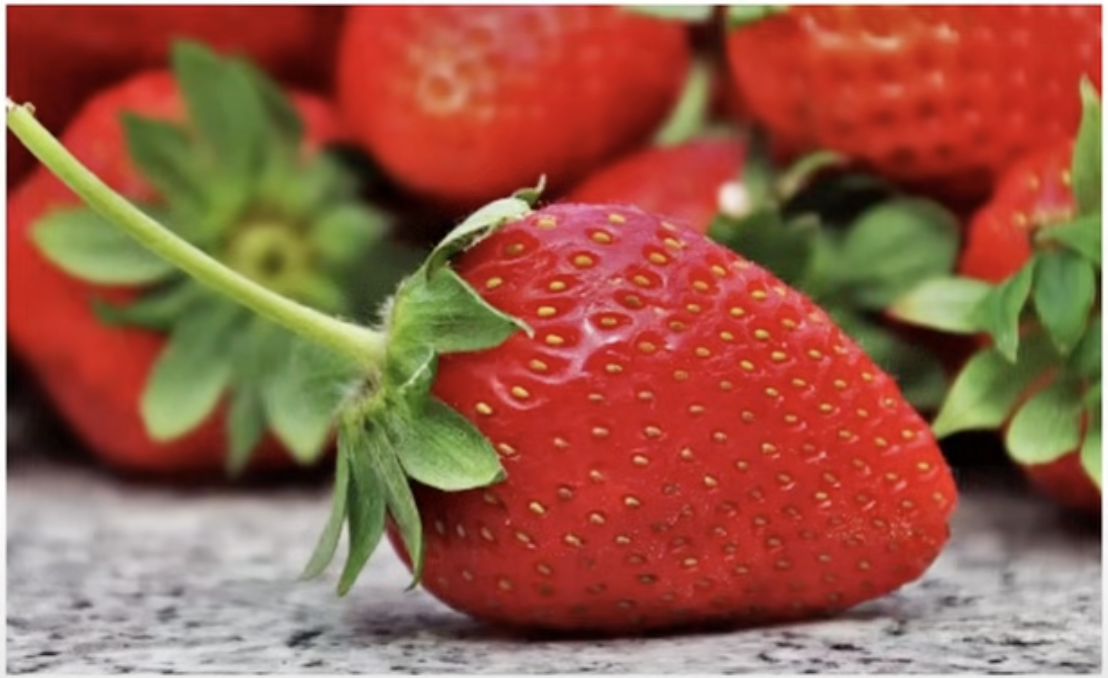

In [277]:
Image(filename='data/MobileNet-samples/3.PNG', width=300, height=200)  # Wyświetlenie obrazu o podanych wymiarach

In [278]:
# Przygotowanie obrazu do predykcji
preprocessed_image = prepare_image('3.PNG')

# Predykcja z użyciem modelu MobileNet
predictions = mobile.predict(preprocessed_image)

# Dekodowanie predykcji na zrozumiałe etykiety
results = imagenet_utils.decode_predictions(predictions)

# Wyświetlenie wyników
results

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


[[('n07745940', 'strawberry', 0.9999304),
  ('n12998815', 'agaric', 1.2510439e-05),
  ('n07734744', 'mushroom', 7.463617e-06),
  ('n12620546', 'hip', 7.195592e-06),
  ('n07720875', 'bell_pepper', 7.135831e-06)]]

In [279]:
# Sprawdzenie, czy pierwszy wynik to 'American chameleon'
assert results[0][0][1] == 'strawberry'
print(results[0][0][1] == 'strawberry')

True
